<a href="https://colab.research.google.com/github/kannursaya/Amazon-Product-Data-Analysis/blob/main/amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/amazon.csv"
df = pd.read_csv(file_path)

In [8]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dt

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [9]:
df = df.dropna(subset=['discounted_price', 'actual_price', 'rating'])

In [10]:
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

In [20]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [12]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       discounted_price   actual_price  discount_percentage  rating_count
count       1463.000000    1463.000000          1463.000000    326.000000
mean        3129.277122    5451.068544            47.650718    348.217791
std         6948.222850   10881.018448            21.622373    268.041590
min           39.000000      39.000000             0.000000      2.000000
25%          325.000000     800.000000            32.000000    119.000000
50%          799.000000    1690.000000            50.000000    293.000000
75%         1999.000000    4312.500000            63.000000    544.000000
max        77990.000000  139900.000000            94.000000    992.000000


In [13]:
df['price_difference'] = df['actual_price'] - df['discounted_price']

In [14]:
sns.set(style="whitegrid")

**Data Vis #1:*Distribution of Ratings***

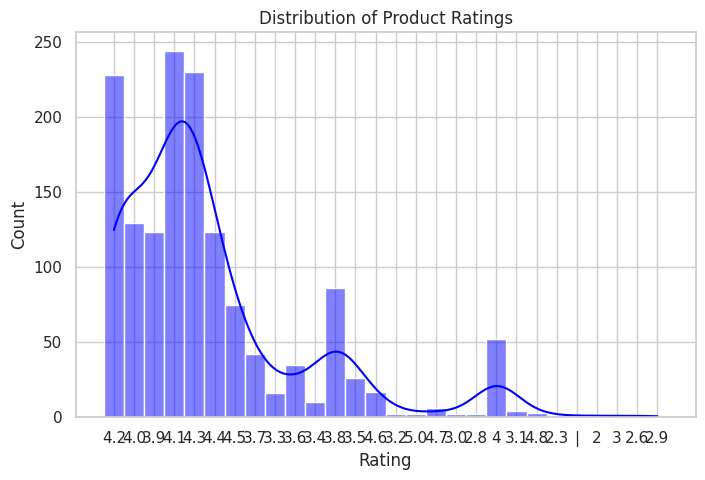

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Data Vis #2: *Price Difference Analysis***

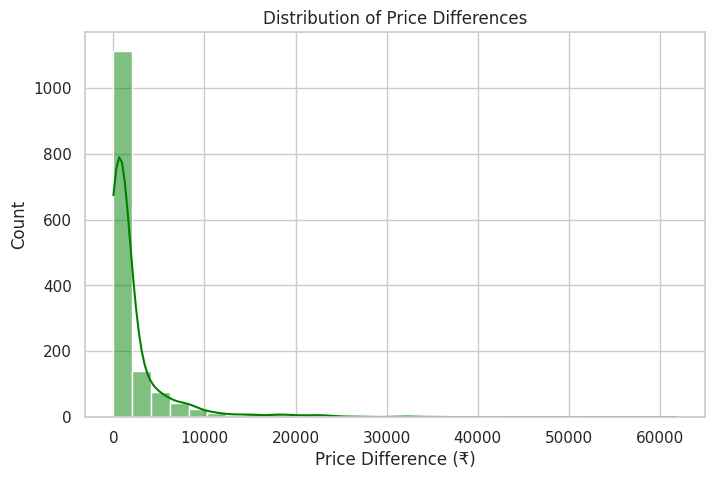

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_difference'], bins=30, kde=True, color='green')
plt.title('Distribution of Price Differences')
plt.xlabel('Price Difference (₹)')
plt.ylabel('Count')
plt.show()

**Data Vis #3: *Discount Percentage vs. Rating***

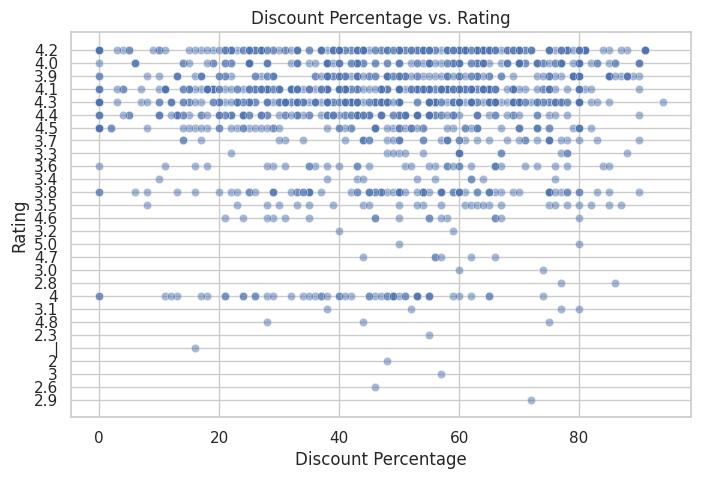

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['discount_percentage'], y=df['rating'], alpha=0.5)
plt.title('Discount Percentage vs. Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

**Data Vis #4: * Top 10 Most Reviewed Products***

<ipython-input-18-efebb30338e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewed.values, y=top_reviewed.index, palette='coolwarm')


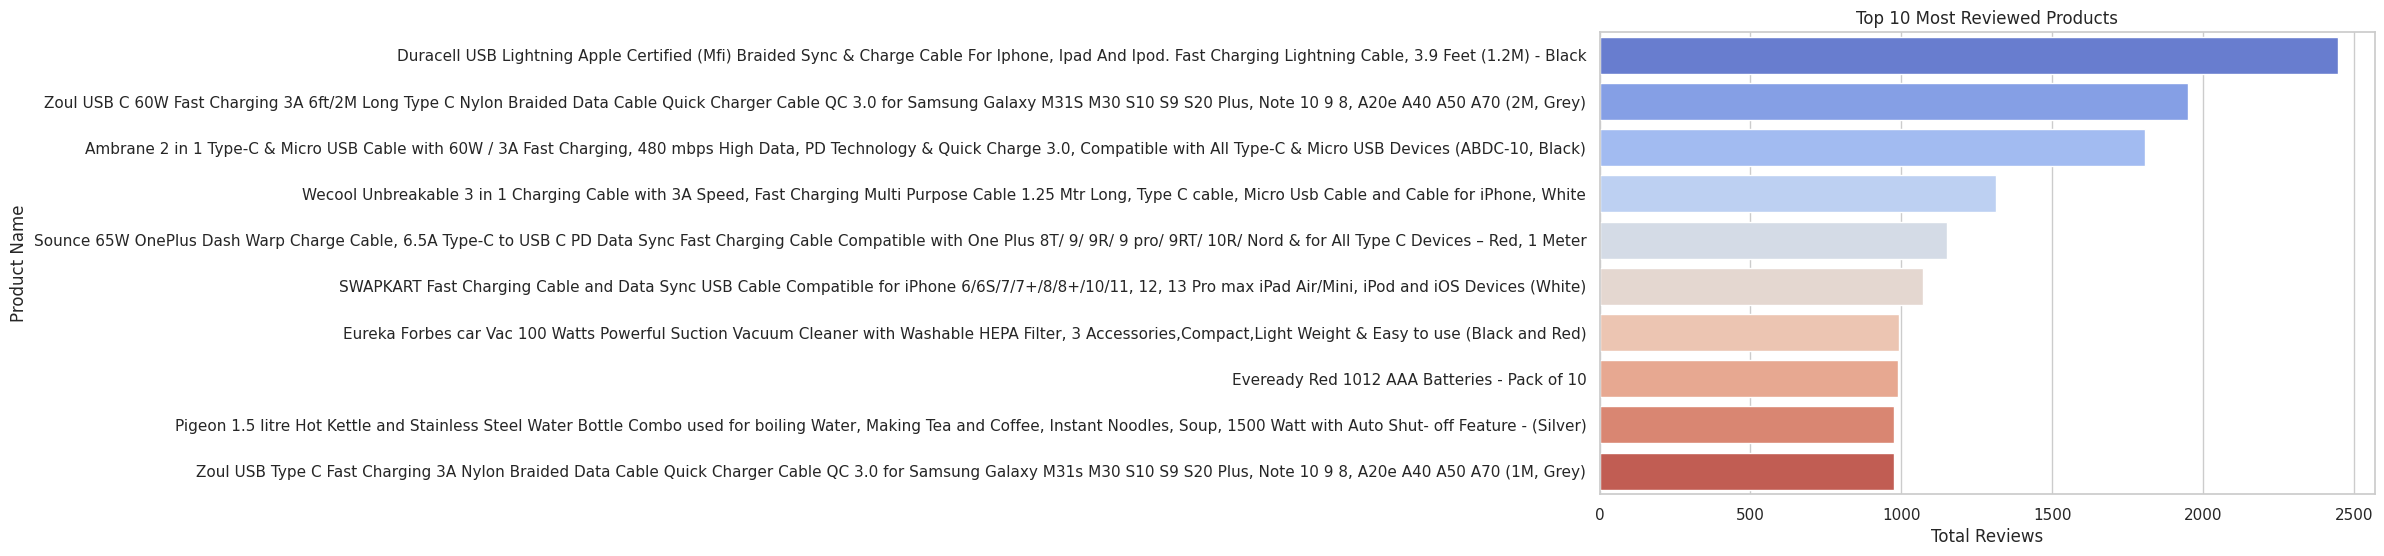

In [18]:
top_reviewed = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_reviewed.values, y=top_reviewed.index, palette='coolwarm')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Total Reviews')
plt.ylabel('Product Name')
plt.show()

**Data Vis #5: * Categories with Highest Average Ratings***

<ipython-input-21-c8a0ce910582>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


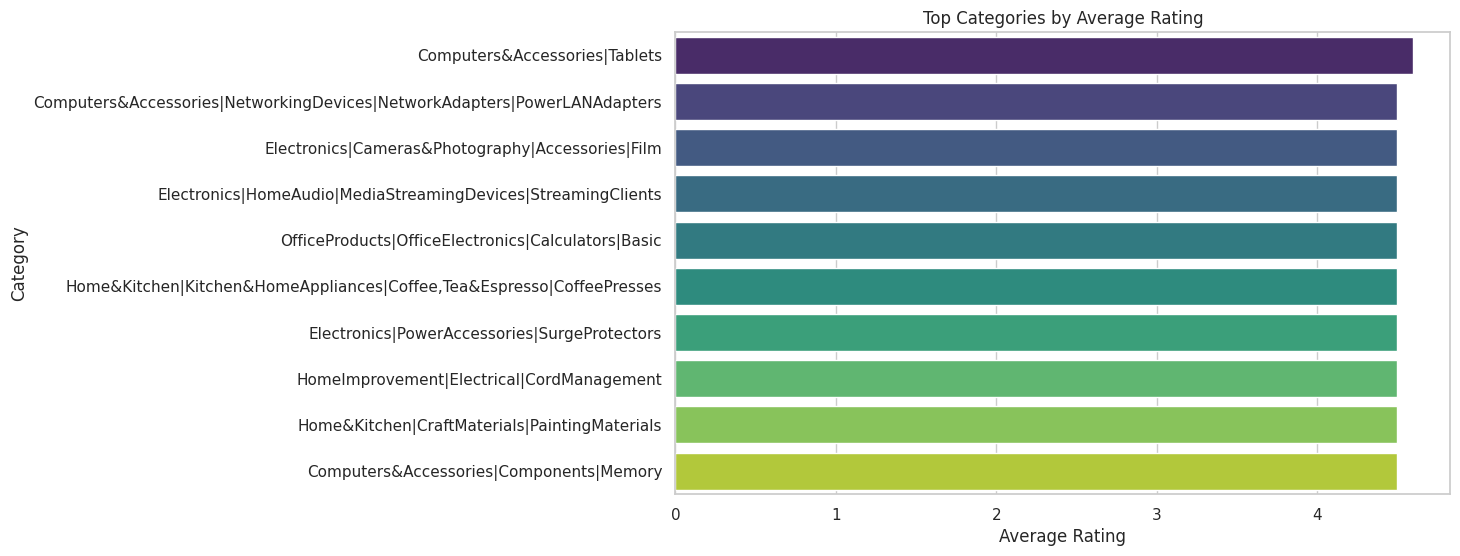

In [21]:
df.dropna(subset=['rating'], inplace=True)  # Remove rows with missing ratings
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

In [22]:
print("\nAnalysis Completed!")


Analysis Completed!
